In [9]:
import pandas as pd
import quandl as qd
import numpy as np
import html5lib 
import bs4
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [3]:
api_key = open("api_key_quandl.txt", "r").read()

In [6]:
def state_list():
    fiddy_states = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states")
    np_fiddy_states = np.array(fiddy_states[0]) 
    return np_fiddy_states[1:,1]    

In [13]:
def grab_initial_state_data():
    main_df = pd.DataFrame()
    for abv in state_list():
        query = "FMAC/HPI_" + abv
        df = qd.get(query, authtoken = api_key)
        df.rename(columns = {"Value":abv}, inplace = True) #If you remove this line an error will occur you can check that out
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            # This is pyhton way of pickling
#     pickle_out = open("fiddy_states.pickle", "wb")
#     pickle.dump(main_df, pickle_out)
#     pickle_out.close()
            # This is pandas way of pickling  
#       main_df.to_pickle('pickle.pickle')  
grab_initial_state_data()

In [10]:
HPI_data = pd.read_pickle('pickle.pickle')
print(HPI_data)

                    AL          AK          AZ          AR          CA  \
Date                                                                     
1975-01-31   35.695975   34.371830   28.937735   36.738861   15.722312   
1975-02-28   35.896770   34.880945   29.463708   37.098962   15.775202   
1975-03-31   36.133518   35.402217   29.959514   37.416398   15.964942   
1975-04-30   36.425723   35.944703   30.345148   37.677813   16.275547   
1975-05-31   36.695708   36.535272   30.546449   37.921099   16.533017   
1975-06-30   36.823713   37.165797   30.496614   38.159640   16.646799   
1975-07-31   36.747060   37.795450   30.173822   38.351084   16.768340   
1975-08-31   36.511773   38.369702   29.662525   38.450073   16.989530   
1975-09-30   36.255136   38.870586   29.128419   38.428010   17.230749   
1975-10-31   36.139294   39.326955   28.828753   38.355341   17.447896   
1975-11-30   36.247464   39.737259   28.941164   38.377787   17.596355   
1975-12-31   36.592162   40.082874   2

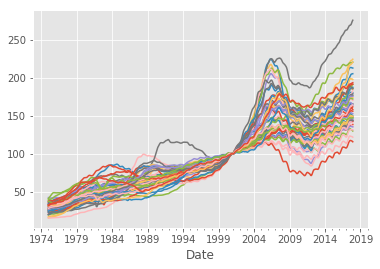

In [12]:
HPI_data.plot()
plt.legend().remove()